In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Create a DataFrame for easier manipulation
df = pd.DataFrame(X, columns=iris.feature_names)

# Step 1: Standardize the data (Z-score scaling)
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)

# Step 2: Center the data (although it should already be centered)
# Calculate the mean of standardized data
mean_centered_data = standardized_data - np.mean(standardized_data, axis=0)

# Step 3: Calculate the covariance matrix
covariance_matrix = np.cov(mean_centered_data, rowvar=False)

# Display the covariance matrix
print("Covariance Matrix:\n", covariance_matrix)


Covariance Matrix:
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [12]:
# Step 3: Perform eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Step 4: Sort the eigenvalues and corresponding eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort in descending order
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Display results
print("Eigenvalues:\n", sorted_eigenvalues)
print("\nEigenvectors:\n", sorted_eigenvectors)

Eigenvalues:
 [2.93808505 0.9201649  0.14774182 0.02085386]

Eigenvectors:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


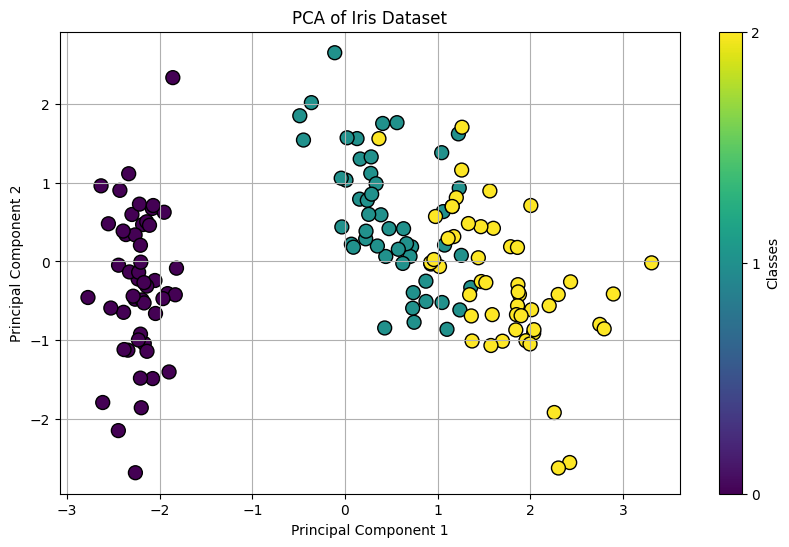

In [13]:
# Step 5: Select the first 2 principal components
top_2_eigenvectors = sorted_eigenvectors[:, :2]

# Step 6: Project the standardized data onto the first 2 principal components
projected_data = standardized_data.dot(top_2_eigenvectors)

# Step 7: Plot the projected data
plt.figure(figsize=(10, 6))
scatter = plt.scatter(projected_data[:, 0], projected_data[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, ticks=[0, 1, 2], label='Classes')
plt.grid()
plt.show()

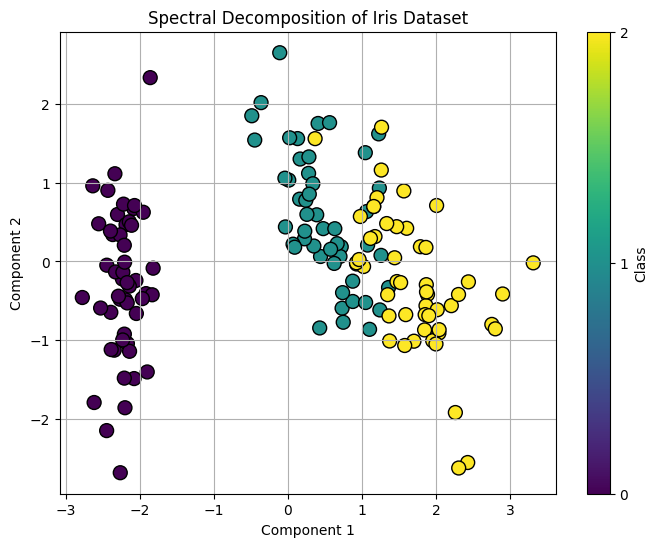

Explained variance ratio for each component: [0.72962445 0.22850762]


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Compute the covariance matrix
covariance_matrix = np.cov(X_standardized, rowvar=False)

# Perform spectral decomposition
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Sort the eigenvalues and corresponding eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Select the first 2 principal components
X_transformed = X_standardized.dot(sorted_eigenvectors[:, :2])

# Function to plot results
def plot_spectral_results(X_transformed, y):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
    plt.title('Spectral Decomposition of Iris Dataset')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.colorbar(scatter, ticks=range(len(np.unique(y))), label='Class')
    plt.xticks()
    plt.yticks()
    plt.grid()
    plt.show()

# Visualize the spectral decomposition results
plot_spectral_results(X_transformed, y)

# Explained variance ratio
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
print("Explained variance ratio for each component:", explained_variance_ratio[:2])


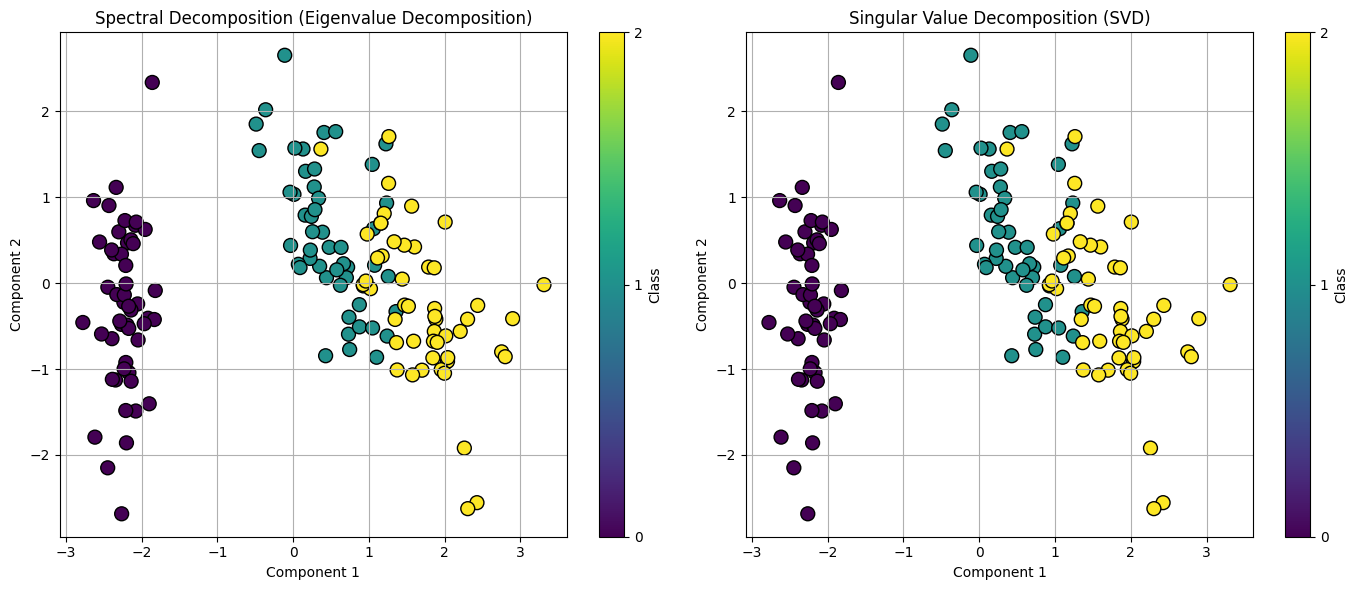

Explained variance ratio (Eigenvalue Decomposition): [0.72962445 0.22850762]
Explained variance ratio (SVD): [0.72962445 0.22850762]


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# --- Spectral Decomposition (Eigenvalue Decomposition) ---
# Compute the covariance matrix
covariance_matrix = np.cov(X_standardized, rowvar=False)

# Perform spectral decomposition
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Sort the eigenvalues and corresponding eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Select the first 2 principal components
X_spectral = X_standardized.dot(sorted_eigenvectors[:, :2])

# --- Singular Value Decomposition (SVD) ---
U, S, VT = np.linalg.svd(X_standardized)

# Select the first 2 principal components using SVD
X_svd = U[:, :2] * S[:2]  # Scale U by the singular values

# Function to plot results
def plot_results(X_transformed, y, title, subplot):
    plt.subplot(1, 2, subplot)
    scatter = plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.colorbar(scatter, ticks=range(len(np.unique(y))), label='Class')
    plt.xticks()
    plt.yticks()
    plt.grid()

# Create subplots for comparison
plt.figure(figsize=(14, 6))
plot_results(X_spectral, y, 'Spectral Decomposition (Eigenvalue Decomposition)', 1)
plot_results(X_svd, y, 'Singular Value Decomposition (SVD)', 2)

# Show plots
plt.tight_layout()
plt.show()

# Explained variance ratio
explained_variance_ratio_eigen = sorted_eigenvalues / np.sum(sorted_eigenvalues)
explained_variance_ratio_svd = (S**2) / np.sum(S**2)

print("Explained variance ratio (Eigenvalue Decomposition):", explained_variance_ratio_eigen[:2])
print("Explained variance ratio (SVD):", explained_variance_ratio_svd[:2])


Dominant Eigenvalue 1: 0.0062054947865887704
Dominant Eigenvector 1: [ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
Dominant Eigenvalue 2: 0.0062054947865887704
Dominant Eigenvector 2: [ 0.36138659 -0.08452251  0.85667061  0.3582892 ]


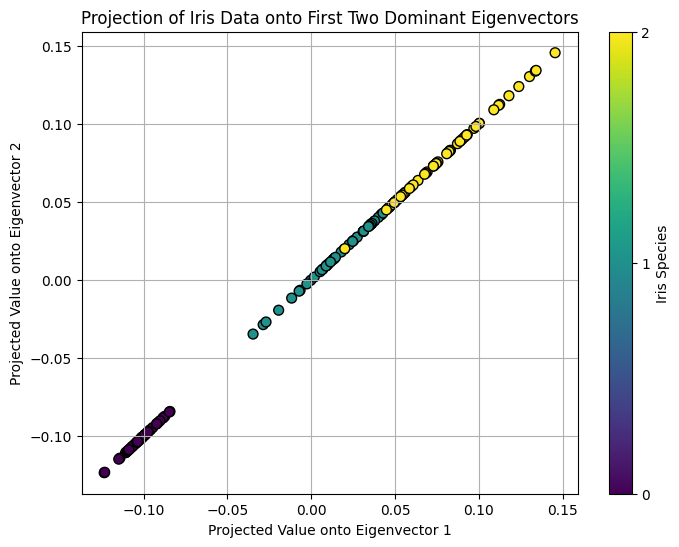

In [17]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data

# Standardize the data
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean
X_normalized = X_centered / np.linalg.norm(X_centered)

# Calculate the covariance matrix
cov_matrix = np.cov(X_normalized.T)

# Power method to find the first two dominant eigenvalues and eigenvectors
def power_method(A, num_iterations: int):
    n, _ = A.shape
    b_k1 = np.random.rand(n)
    b_k2 = np.random.rand(n)

    for _ in range(num_iterations):
        b_k1 = np.dot(A, b_k1)
        b_k1 = b_k1 / np.linalg.norm(b_k1)

        b_k2 = np.dot(A, b_k2)
        b_k2 = b_k2 / np.linalg.norm(b_k2)

    eigenvalue1 = np.dot(b_k1, np.dot(A, b_k1)) / np.dot(b_k1, b_k1)
    eigenvalue2 = np.dot(b_k2, np.dot(A, b_k2)) / np.dot(b_k2, b_k2)

    return (eigenvalue1, b_k1), (eigenvalue2, b_k2)

# Perform the power method
num_iterations = 100
(eigenvalue1, eigenvector1), (eigenvalue2, eigenvector2) = power_method(cov_matrix, num_iterations)

print("Dominant Eigenvalue 1:", eigenvalue1)
print("Dominant Eigenvector 1:", eigenvector1)
print("Dominant Eigenvalue 2:", eigenvalue2)
print("Dominant Eigenvector 2:", eigenvector2)

# Projecting the data onto the first two dominant eigenvectors
X_projected = np.dot(X_normalized, np.column_stack((eigenvector1, eigenvector2)))

# Plotting the projected data
plt.figure(figsize=(8, 6))
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=iris.target, cmap='viridis', edgecolor='k', s=50)
plt.title('Projection of Iris Data onto First Two Dominant Eigenvectors')
plt.xlabel('Projected Value onto Eigenvector 1')
plt.ylabel('Projected Value onto Eigenvector 2')
plt.colorbar(ticks=[0, 1, 2], label='Iris Species')
plt.grid()
plt.show()


Dominant Eigenvalue 1: 0.0062054947865887704
Dominant Eigenvector 1: [ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
Dominant Eigenvalue 2: 0.0062054947865887704
Dominant Eigenvector 2: [ 0.36138659 -0.08452251  0.85667061  0.3582892 ]


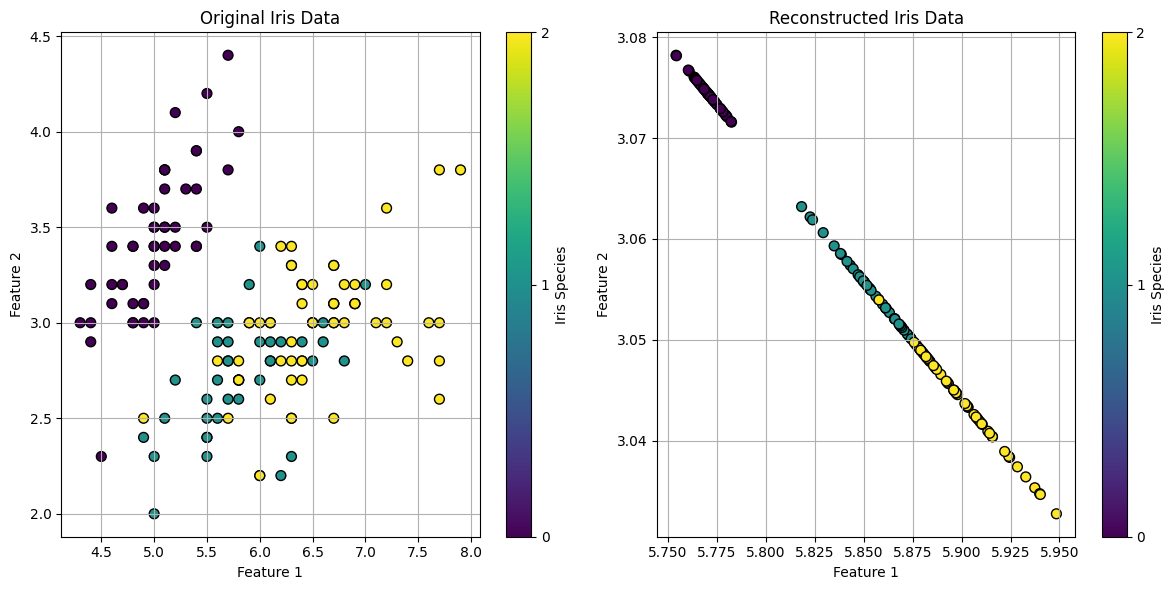

In [21]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data

# Standardize the data
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean
X_normalized = X_centered / np.linalg.norm(X_centered)

# Calculate the covariance matrix
cov_matrix = np.cov(X_normalized.T)

# Power method to find the first two dominant eigenvalues and eigenvectors
def power_method(A, num_iterations: int):
    n, _ = A.shape
    b_k1 = np.random.rand(n)
    b_k2 = np.random.rand(n)

    for _ in range(num_iterations):
        b_k1 = np.dot(A, b_k1)
        b_k1 = b_k1 / np.linalg.norm(b_k1)

        b_k2 = np.dot(A, b_k2)
        b_k2 = b_k2 / np.linalg.norm(b_k2)

    eigenvalue1 = np.dot(b_k1, np.dot(A, b_k1)) / np.dot(b_k1, b_k1)
    eigenvalue2 = np.dot(b_k2, np.dot(A, b_k2)) / np.dot(b_k2, b_k2)

    return (eigenvalue1, b_k1), (eigenvalue2, b_k2)

# Perform the power method
num_iterations = 100
(eigenvalue1, eigenvector1), (eigenvalue2, eigenvector2) = power_method(cov_matrix, num_iterations)

print("Dominant Eigenvalue 1:", eigenvalue1)
print("Dominant Eigenvector 1:", eigenvector1)
print("Dominant Eigenvalue 2:", eigenvalue2)
print("Dominant Eigenvector 2:", eigenvector2)

# Projecting the data onto the first two dominant eigenvectors
X_projected = np.dot(X_normalized, np.column_stack((eigenvector1, eigenvector2)))

# Reconstructing the data from the projections
X_reconstructed = np.dot(X_projected, np.column_stack((eigenvector1, eigenvector2)).T)

# Adding back the mean to the reconstructed data
X_reconstructed += X_mean

# Plotting the original and reconstructed data
plt.figure(figsize=(12, 6))

# Original data plot
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=iris.target, cmap='viridis', edgecolor='k', s=50)
plt.title('Original Iris Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(ticks=[0, 1, 2], label='Iris Species')
plt.grid()

# Reconstructed data plot
plt.subplot(1, 2, 2)
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], c=iris.target, cmap='viridis', edgecolor='k', s=50)
plt.title('Reconstructed Iris Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(ticks=[0, 1, 2], label='Iris Species')
plt.grid()

plt.tight_layout()
plt.show()


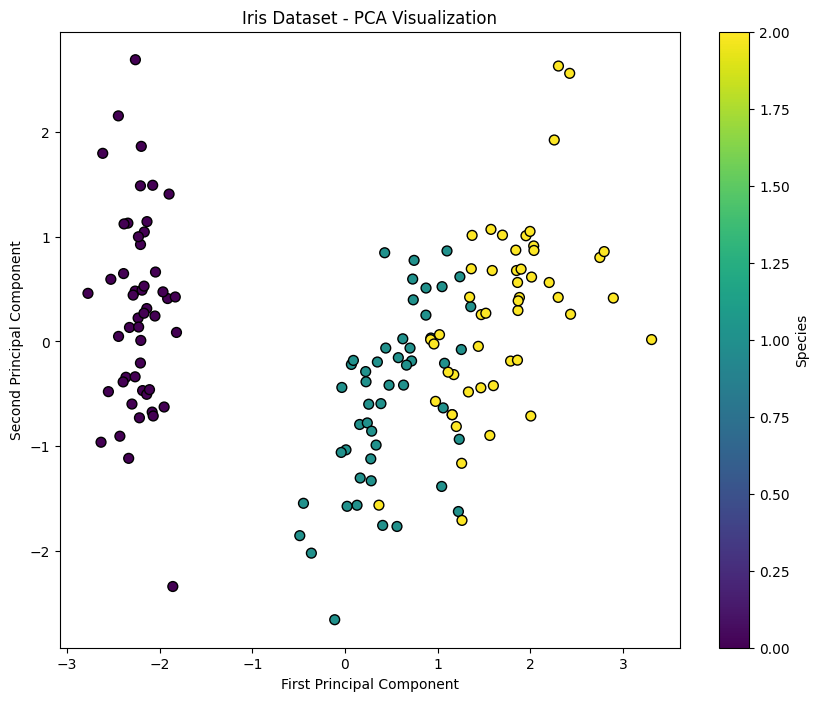

Explained variance ratio: [0.72962445 0.22850762]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

def power_iteration(X, num_components=2, max_iter=100, tol=1e-8):
    n, d = X.shape
    components = []
    for _ in range(num_components):
        eigenvector = np.random.rand(d)
        for _ in range(max_iter):
            previous = eigenvector
            eigenvector = X.T @ (X @ eigenvector)
            eigenvector = eigenvector / np.linalg.norm(eigenvector)
            if np.abs(eigenvector @ previous - 1) < tol:
                break
        components.append(eigenvector)
        X = X - X @ eigenvector.reshape(-1, 1) @ eigenvector.reshape(1, -1)
    return np.array(components).T

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform manual PCA using power iteration method
pca_components = power_iteration(X_scaled)

# Project the data onto the first two principal components
X_pca = X_scaled @ pca_components

# Visualize the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Iris Dataset - PCA Visualization')
plt.colorbar(scatter, label='Species')
plt.show()

# Print the explained variance ratio
total_var = np.var(X_scaled, axis=0).sum()
explained_var_ratio = np.var(X_pca, axis=0) / total_var
print("Explained variance ratio:", explained_var_ratio)